D50 (taille de particule pour 50% de passage) : 1.45 mm


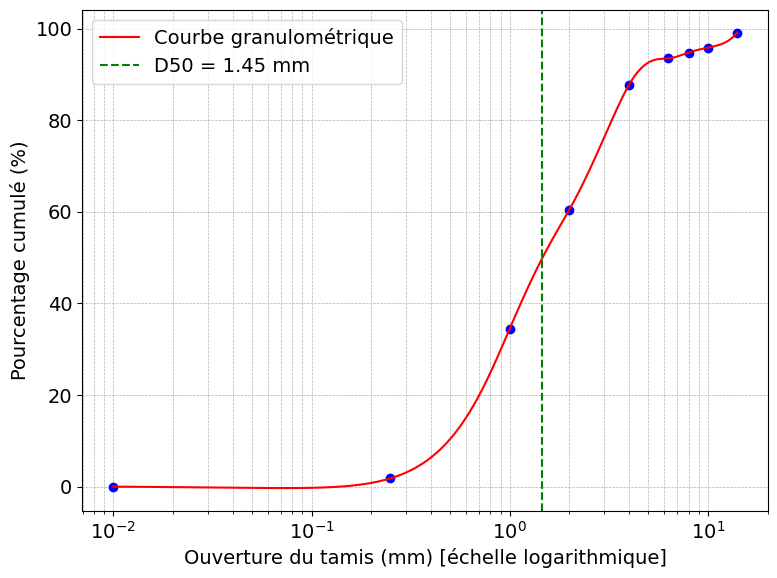

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Données mesurées à Biasca
tamis_mm = np.array([14, 10, 8, 6.3, 4, 2, 1, 0.25, 1e-02])
passant_percent = np.array([99.10, 95.85, 94.77, 93.50, 87.73, 60.47, 34.48, 1.81, 0.00])

# Inversion des données pour qu'elles soient croissantes 
tamis_mm = tamis_mm[::-1]
passant_percent = passant_percent[::-1]

# Interpolation spline 
spl = interpolate.splrep(tamis_mm, passant_percent, s=0)  # s=0 pour une interpolation exacte

# Plage des tailles pour l'interpolation
tamis_mm_fine = np.logspace(np.log10(tamis_mm[-1]), np.log10(tamis_mm[0]), 500)
passant_percent_fine = interpolate.splev(tamis_mm_fine, spl)

# Calcul du D50 en utilisant l'interpolation
d50_value = tamis_mm_fine[np.abs(passant_percent_fine - 50).argmin()]
print(f"D50 (taille de particule pour 50% de passage) : {d50_value:.2f} mm")

# Création du graphique
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 6))
plt.semilogx(tamis_mm, passant_percent, marker='o', linestyle='None', color='b')
plt.semilogx(tamis_mm_fine, passant_percent_fine, linestyle='-', color='r', label='Courbe granulométrique')
plt.axvline(x=d50_value, color='g', linestyle='--', label=f'D50 = {d50_value:.2f} mm')
plt.gca().set_xscale("log")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.xlabel("Ouverture du tamis (mm) [échelle logarithmique]")
plt.ylabel("Pourcentage cumulé (%)")
#plt.title("Courbe granulométrique avec interpolation spline")
plt.legend()
plt.tight_layout()

# Enregistrement du graphique en PNG
plt.savefig("granulometrie_DP.png")

# Affichage du graphique
plt.show()
